# Cat Revenge Game

Here's a map of Cat Revenge.

![cat_game.jpg](cat_game.jpg)

### Import Text Adventures

In [1]:
from text_adventure_games import (
    games, parsing, actions, things, blocks, viz
)

## Locations

In [2]:
bedroom = things.Location(
    "Bedroom",
    "You are standing in the bedroom. This is where the human who feeds you sleeps."
)

bathroom = things.Location(
    "Bathroom",
    "You are standing in the bathroom. You don't like it when your human puts water on you."
)

kitchen = things.Location(
    "Kitchen",
    "You are standing in the kitchen. This is where delicious smells sometimes come from."
)

living_room = things.Location(
    "Living Room",
    "You are standing in the living room. There is a table."
)

table = things.Location(
    "Living Room Table",
    "You are standing on top of the table. There are stuff on the table."
)


# map out the locations
bedroom.add_connection("north", bathroom)
bedroom.add_connection("west", living_room)
living_room.add_connection("north", kitchen)
living_room.add_connection("up", table)

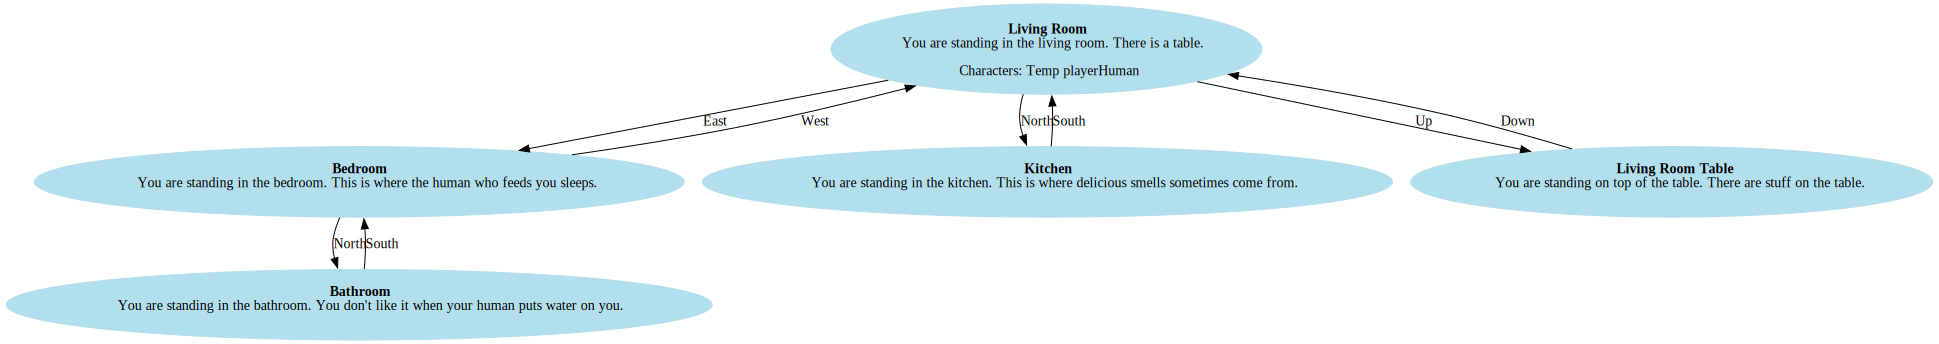

In [4]:
tempgame = games.Game(living_room, things.Character(name="Human", description="", persona=""))

from text_adventure_games.viz import Visualizer
viz = Visualizer(tempgame)
graph = viz.visualize()
graph

## Items
all non-gettable because you are a cat

In [ ]:
# Put a cup at the living room
plastic_cup = things.Item(
    "cup",
    "a plastic cup with no water in it",
    "A PLASTIC DISPOSABLE CUP THAT BELONGS IN THE TRASH CAN",
)
plastic_cup.set_property("gettable", False)
plastic_cup.set_property("is_breakable", False) # it may never be broken
plastic_cup.set_property("is_broken", False)
table.add_item(plastic_cup)

# Put a mug at the living room
mug = things.Item(
    "mug",
    "a mug with cartoon smile face",
    "IT IS THE HUMAN'S FAVORITE MUG",
)
mug.set_property("gettable", False)
mug.set_property("is_breakable", True)
mug.set_property("is_broken", False)
table.add_item(mug)

# Put a toilet paper roll in the bathroom
paper_roll = things.Item(
    "paper_roll",
    "a toilet paper roll",
    "IT IS ROLLABLE",
)
paper_roll.set_property("gettable", False)
paper_roll.set_property("in_stock", True)
bathroom.add_item(paper_roll)

# Put cat food bowl in the kitchen 
bowl = things.Item(
    "bowl",
    "a plastic cat-food bowl",
    "YOU JUST ATE YOUR BREAKFAST HERE, YOU LOVE THE BOWL",
)
bowl.set_property("gettable", False)
bowl.set_property("is_empty", True) # can get the owner to fill the bowl
kitchen.add_item(bowl)


## Characters

### Player

In [ ]:
# Player - the cat
player = things.Character(
    name = "the cat",
    description = "You are a cat. Your owner didn't give you any of your favorite midnight yummy treats to eat last night so you are craving them and cranky.",
    persona = "I want revenge, my human should've fed me my delicious treats on time.",
)
player.set_property("character_type", "cat")
player.set_property("got_revenge", False)


### Non-Player Characters (NPCs)

In [ ]:
# The owner
human = things.Character(
    name = "human",
    description = "A regular-schmegular, normal human.",
    persona = "I love my cat but I don't understand him sometimes."
)
human.set_property("character_type", "human")
human.set_property("is_alert", False)
# the human stands in the living room
living_room.add_character(human)


## Actions

In [ ]:
class Push_Mug(actions.Action): # or just push for both cup and mug, whichever is easier
    ACTION_NAME = "push mug"
    ACTION_DESCRIPTION = "Push the mug off the table"
    ACTION_ALIASES = []
    
    def __init__(self, game, command):
        super().__init__(game)
        # TODO
        self.character = self.parser.get_character(command)
        self.owner = self.parser.get_character("human")
        self.mug = self.parser.match_item(
            "mug", self.parser.get_items_in_scope(self.character)
        )
        

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * There must be a mug
        * The cat must be at the same location as the mug
        * The mug must be unbroken
        * The owner must not be near by (owner cannot be in living room or kitchen)
        """
        # TODO
        if not self.mug.location.here(self.character):
            self.parser.fail("There is nothing to push, you meow in search for something.")
            return False
        if self.mug.get_property("is_broken"):
            self.parser.fail("The mug is already broken, you let out a hiss.")
            return False
        if living_room.here(self.owner):
            self.parser.fail("\"Hey, hey, hey!\" your human frowns at you and " +
                             "reaches their hand out to hold the mug in place. " +
                             "\"Don't touch this, ok?\"")
            return False
        if kitchen.here(self.owner):
            self.parser.fail("\"HEY! DON'T TOUCH THAT!\" Your human looks up and catches you " + 
                             "pushing the mug close to the edge of the table. " +
                             "They run over and move the mug back in place.")
            kitchen.remove_character(human)
            living_room.add_character(human)
            return False
        return True


    def apply_effects(self):
        """
        Effects:
        * Push mug off table and break it
        """
        # TODO
        wreak_havoc = "".join(
            [
                f"You, {self.character.name}, slowly push your paw against the ",
                "mug's surface. It inches towards the edge of the table. ",
                "You then see it tumble onto the floor and BANG. It shatters ",
                "and tea spashes everywhere."
            ]
        )
        mug.set_property("is_broken", True)
        player.set_property("got_revenge", True)
        description = wreak_havoc.format(character_name=self.character.name)
        self.parser.ok(description)



In [ ]:
class Push_Cup(actions.Action):
    ACTION_NAME = "push cup"
    ACTION_DESCRIPTION = "Push the cup off the table"
    ACTION_ALIASES = []
    
    def __init__(self, game, command):
        super().__init__(game)
        # TODO
        self.character = self.parser.get_character(command)
        self.owner = self.parser.get_character("human")
        self.cup = self.parser.match_item(
            "cup", self.parser.get_items_in_scope(self.character)
        )


    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * There must be a cup
        * The cat must be at the same location as the cup
        * The owner must not be near by (owner cannot be in living room or kitchen)
        """
        # TODO
        if not self.cup.location.here(self.character):
            self.parser.fail("There is nothing to push, you meow in search for something.")
            return False
        if living_room.here(self.owner):
            self.parser.fail("\"Hey, no!\" your human grabs the cup before it " +
                             " can fall. \"This has juice in it, ok?\" They move " +
                             "it back in place.")
            return False
        if kitchen.here(self.owner):
            self.parser.fail("\"HEY! No, no, no!\" Your human looks at you from " +
                             "the kitchen as you nudge the cup around. " +
                             "They keep an eye on you, preventing you from doing " +
                             "anything else.")
            kitchen.remove_character(human)
            living_room.add_character(human)
            return False
        return True


    def apply_effects(self):
        """
        Effects:
        * Push cup off table
        """
        # TODO
        wreak_havoc = "".join(
            [
                "You nudge the plastic cup with the top of your head.  ",
                "It reaches the edge of the table and you soon see it fall to ",
                "the ground. Juice spills everywhere, but the plastic cup is fine. ",
                "You let out a disappointed meow.",
            ]
        )
        description = wreak_havoc.format(character_name=self.character.name)
        self.parser.ok(description)


In [ ]:
class Play_Roll(actions.Action):
    ACTION_NAME = "Play with the toilet paper roll"
    ACTION_DESCRIPTION = "play with the toilet paper roll"
    ACTION_ALIASES = []
    
    def __init__(self, game, command):
        super().__init__(game)
        # TODO
        self.character = self.parser.get_character(command)
        self.toilet_paper = self.parser.match_item(
            "paper_roll", self.parser.get_items_in_scope(self.character)
        )
    

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * There must be a toilet paper on the roller next to the toilet
        * The cat must be at the same location as the toilet_paper
        * The toilet paper is in stock
        """
        # TODO
        if self.toilet_paper.location.here(self.character):
            self.parser.fail("There is nothing to play with, the toilet paper is not here.")
            return False
        if not self.toiler_paper.get_property("in_stock"):
            self.parser.fail("The toilet paper holder is empty. " +
                             "The toilet paper has not been refilled.")
            return False
        

    def apply_effects(self):
        """
        You play with the toilet paper roll and completely unravel it from the holder.
        You hiss at the pile.
        Your owner hears you and comes to the bathroom. (remove the owner from the living room too)
        """
        # TODO
        played = "".join(
            [
                f"You, {self.character.name}, swat at the toilet paper end hanging ",
                "from the holder. You play with the toilet paper roll and ",
                "completely unravel it. The holder comes toppling down.\n",
                "Your owner hears you, comes to the bathroom, and stands at the ",
                "doorframe in shock. \nLetting out a sigh, your owner gets busy, ",
                "cleaning up the pile.",
            ]
        )
        living_room.remove_character(human)
        bathroom.add_character(human)
        description = played.format(character_name=self.character.name)
        self.parser.ok(description)


In [ ]:
class Meow_bowl(actions.Action): # or just push for both cup and mug, whichever is easier
    ACTION_NAME = "meow at bowl"
    ACTION_DESCRIPTION = "making noise so that the owner needs to feed you"
    ACTION_ALIASES = []
    
    def __init__(self, game, command):
        super().__init__(game)
        # TODO
        self.character = self.parser.get_character(command)
        self.character = self.parser.get_character(human)
        self.bowl = self.parser.match_item(
            "bowl", self.parser.get_items_in_scope(self.character)
        )
        self.bathroom = bathroom
        

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The cat must be at the same location as the food bowl.
        * The food bowl must be full.
        * Your owner must be able to hear you, they cannot be in the bathroom.
        """
        # TODO
        if self.bowl.location.here(self.character):
            self.parser.fail("There is nothing to meow at, your food bowl is not here.")
            return False
        if not self.bowl.get_property("in_stock"):
            self.parser.fail("The food bowl is empty. " +
                             "It has not been filled for this.")
            return False
        if self.human.location.here(self.bathroom):
            self.parser.fail("Your owner cannot hear you, they are too far away.")
            return False
        return True
        

    def apply_effects(self):
        """
        After meowing at the bowl, your owner comes to kitchen and fills the
        food bowl. The owner is alert to their surroundings 
        (as they can see what's going on in the living room from the kitchen).
        """
        # TODO
        meowed = "".join(
            [
                "After meowing at the bowl, your owner comes to the kitchen. ",
                "They notice your bowl is empty and finds your canned food. ",
                "They then fill your bowl up. From the kitchen, can see what's ",
                "going on in the living room and become more alert.",
            ]
        )
        living_room.remove_character(human)
        kitchen.add_character(human)
        description = meowed.format(character_name=self.character.name)
        self.parser.ok(description)


## Blocks

* human block: it prevents the cat to get to the items on the table

In [ ]:
class Human_Block(blocks.Block):
    def __init__(self, location:things.Location, human:things.Character):
        super().__init__(
            "The human blocks your way","The human don't want you to touch the cup and the mug on the table"
        )
        self.location = location
        self.human = human

    def is_blocked(self) -> bool:
        # Conditions of block:
        # * There is a human here
        if not self.location.here(self.human):
            return False
        return True

In [ ]:
# Add blocks to location
human_block = Human_Block(living_room, human)
living_room.add_block("up", human_block)

## Play the Cat Game

In [ ]:
class CatGame(games.Game):
    def __init__(
        self, start_at: things.Location, player: things.Character, characters=None,
        custom_actions=None
    ):
        super().__init__(start_at, player, characters=characters, custom_actions=custom_actions)

    def is_won(self) -> bool:
        """ 
        Checks whether the game has been won. 
        The cat has to push the mug so it breaks (without being caught) to win.
        """
        
        if player.get_property("got_revenge"):
            # winning message credits to chatgpt
            msg = "".join(
                [
                    "You pushed your human's mug! As it tumbles towards the ",
                    "ground, you watch with a glint in your eye. The satisfying ",
                    "crash echoes through the house, a symphony of sweet ",
                    "revenge for last night's dinner fiasco. You've proven that ",
                    "even the smallest creature can make a big statement. Well ",
                    "done, stealthy feline! ~(OuO)~",
                ]
            )
            self.parser.ok(msg)
            return True
        return False

In [ ]:

characters = [human]
custom_actions = []

# The Game
game = CatGame(bedroom, player, characters=characters, custom_actions=custom_actions)


In [ ]:
game.game_loop()

You are standing in a small cottage.
Exits:
Out to Garden Path

You see:
 * a fishing pole


The player got the pole.
You are standing on a lush garden path. There is a cottage here.
Exits:
In to Cottage
South to Fishing Pond
North to Winding Path

You see:
 * a rosebush
        pick rose


You are walking along a winding path. There is a tall tree here.
Exits:
South to Garden Path
Up to Top of the Tall Tree
East to Drawbridge




You are standing on a lush garden path. There is a cottage here.
Exits:
In to Cottage
South to Fishing Pond
North to Winding Path

You see:
 * a rosebush
        pick rose


You are at the edge of a small fishing pond.
Exits:
North to Garden Path

You see:
 * a small fishing pond
        catch fish with pole
        catch fish


The player dips their hook into the pond and catches a fish
You are standing on a lush garden path. There is a cottage here.
Exits:
In to Cottage
South to Fishing Pond
North to Winding Path

You see:
 * a rosebush
        pick rose


